In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import __version__
print(__version__)
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_columns', None)
import tensorflow_data_validation as dv
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind


4.14.3


In [2]:
data=pd.read_csv('/Users/fabiobisognin/Desktop/210430COVID19MEXICO.csv')


In [3]:
data['FECHA_INGRESO']=pd.to_datetime(data['FECHA_INGRESO'])
data['FECHA_SINTOMAS']=pd.to_datetime(data['FECHA_SINTOMAS'])


In [4]:
data=data[data['ENTIDAD_NAC']==15]


In [5]:
intub=data[['INTUBADO', 'FECHA_DEF']]
intubad=intub[intub['INTUBADO']!= '9999-99-99']


In [6]:
data['DEF']=data['FECHA_DEF']
data.loc[data['FECHA_DEF']=='9999-99-99', 'DEF']=0
data.loc[data['FECHA_DEF']!='9999-99-99', 'DEF']=1
data['DEF']=data['DEF'].astype(int)

In [7]:
data['DEF_DATE'] = data['FECHA_DEF']


In [8]:
data['INTUB']=data['INTUBADO']
data.loc[data['INTUBADO']==97, 'INTUB']=0
data.loc[data['INTUBADO']!=97, 'INTUB']=1

# ANALISIS ESTADISTICOS

In [9]:
#creo una copia
df=data


In [10]:
df['RESULTADO']=df['RESULTADO_ANTIGENO']
df.loc[df['RESULTADO_ANTIGENO']==97, 'RESULTADO']=1
df.loc[df['RESULTADO_ANTIGENO']!=97, 'RESULTADO']=0

In [11]:
df['SEXO']=df['SEXO'].astype(str)
df.replace({'SEXO' : { 'hombre' : '2', 'mujer' : '1'}})

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,DEF,DEF_DATE,INTUB,RESULTADO
14,2021-04-30,z4f06b,1,6,22,2,15,22,14,1,2020-08-31,2020-08-26,9999-99-99,97,2,54,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,99,México,97,97,0,9999-99-99,0,1
21,2021-04-30,z388cd,1,12,29,2,15,21,117,2,2020-07-01,2020-06-26,9999-99-99,2,1,12,1,97,2,2,1,2,2,2,2,2,2,2,2,2,1,2,97,2,97,1,99,México,97,2,0,9999-99-99,1,1
60,2021-04-30,z2b144,2,12,9,1,15,9,2,1,2020-06-15,2020-06-12,9999-99-99,97,2,13,1,2,99,2,2,2,2,2,2,2,2,2,2,2,1,1,4,2,97,5,99,México,97,97,0,9999-99-99,0,1
61,2021-04-30,z4e838,1,12,9,2,15,15,95,2,2020-02-18,2020-02-18,2020-05-11,1,1,60,1,97,2,2,2,2,2,2,2,2,2,2,2,1,99,1,2,2,97,7,99,México,97,2,1,2020-05-11,1,1
75,2021-04-30,z579ac,1,12,15,2,15,15,60,1,2020-10-14,2020-10-10,9999-99-99,97,2,33,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,4,2,97,6,99,México,97,97,0,9999-99-99,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6632861,2021-04-30,6a05db,2,12,9,2,15,9,2,1,2021-04-20,2021-04-20,9999-99-99,97,2,26,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,México,97,97,0,9999-99-99,0,0
6632868,2021-04-30,c72950,2,12,9,2,15,15,103,1,2021-04-21,2021-04-21,9999-99-99,97,2,42,1,97,2,2,2,2,2,2,2,2,2,2,2,1,1,2,97,1,2,7,99,México,97,97,0,9999-99-99,0,0
6632910,2021-04-30,4a0d9e,2,12,9,1,15,9,3,1,2021-04-16,2021-04-16,9999-99-99,97,2,30,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,México,97,97,0,9999-99-99,0,0
6632921,2021-04-30,a44ead,2,12,9,1,15,9,7,1,2021-04-21,2021-04-21,9999-99-99,97,2,48,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,97,1,2,7,99,México,97,97,0,9999-99-99,0,0


In [12]:
df['indigena']=df['INDIGENA']
df.loc[df['INDIGENA']==2, 'indigena']=0
df.loc[df['INDIGENA']!=2, 'indigena']=1

In [13]:
df['neumonia']=df['NEUMONIA']
df.loc[df['NEUMONIA']==2, 'neumonia']=0
df.loc[df['NEUMONIA']!=2, 'neumonia']=1
df['diabetes']=df['DIABETES']
df.loc[df['DIABETES']==2, 'diabetes']=0
df.loc[df['DIABETES']!=2, 'diabetes']=1
df['epoc']=df['EPOC']
df.loc[df['EPOC']==2, 'epoc']=0
df.loc[df['EPOC']!=2, 'epoc']=1
df['asma']=df['ASMA']
df.loc[df['ASMA']==2, 'asma']=0
df.loc[df['ASMA']!=2, 'asma']=1
df['inmusupr']=df['INMUSUPR']
df.loc[df['INMUSUPR']==2, 'inmusupr']=0
df.loc[df['INMUSUPR']!=2, 'inmusupr']=1

In [14]:

df['hipertension']=df['HIPERTENSION']
df.loc[df['HIPERTENSION']==2, 'hipertension']=0
df.loc[df['HIPERTENSION']!=2, 'hipertension']=1
df['otra_com']=df['HIPERTENSION']
df.loc[df['OTRA_COM']==2, 'otra_com']=0
df.loc[df['OTRA_COM']!=2, 'otra_com']=1
df['cardiovascular']=df['CARDIOVASCULAR']
df.loc[df['CARDIOVASCULAR']==2, 'cardiovascular']=0
df.loc[df['CARDIOVASCULAR']!=2, 'cardiovascular']=1
df['obesidad']=df['OBESIDAD']
df.loc[df['OBESIDAD']==2, 'obesidad']=0
df.loc[df['OBESIDAD']!=2, 'obesidad']=1
df['renal_cronica']=df['RENAL_CRONICA']
df.loc[df['RENAL_CRONICA']==2, 'renal_cronica']=0
df.loc[df['RENAL_CRONICA']!=2, 'renal_cronica']=1
df['tabaquismo']=df['TABAQUISMO']
df.loc[df['TABAQUISMO']==2, 'tabaquismo']=0
df.loc[df['TABAQUISMO']!=2, 'tabaquismo']=1
df['otro_caso']=df['OTRO_CASO']
df.loc[df['OTRO_CASO']==2, 'otro_caso']=0
df.loc[df['OTRO_CASO']!=2, 'otro_caso']=1
df['embarazo']=df['EMBARAZO']
df.loc[df['EMBARAZO']==97, 'embarazo']=0
df.loc[df['EMBARAZO']!=97, 'embarazo']=1


In [15]:
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,DEF,DEF_DATE,INTUB,RESULTADO,indigena,neumonia,diabetes,epoc,asma,inmusupr,hipertension,otra_com,cardiovascular,obesidad,renal_cronica,tabaquismo,otro_caso,embarazo
14,2021-04-30,z4f06b,1,6,22,2,15,22,14,1,2020-08-31,2020-08-26,9999-99-99,97,2,54,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,99,México,97,97,0,9999-99-99,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,2021-04-30,z388cd,1,12,29,2,15,21,117,2,2020-07-01,2020-06-26,9999-99-99,2,1,12,1,97,2,2,1,2,2,2,2,2,2,2,2,2,1,2,97,2,97,1,99,México,97,2,0,9999-99-99,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0
60,2021-04-30,z2b144,2,12,9,1,15,9,2,1,2020-06-15,2020-06-12,9999-99-99,97,2,13,1,2,99,2,2,2,2,2,2,2,2,2,2,2,1,1,4,2,97,5,99,México,97,97,0,9999-99-99,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
61,2021-04-30,z4e838,1,12,9,2,15,15,95,2,2020-02-18,2020-02-18,2020-05-11,1,1,60,1,97,2,2,2,2,2,2,2,2,2,2,2,1,99,1,2,2,97,7,99,México,97,2,1,2020-05-11,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0
75,2021-04-30,z579ac,1,12,15,2,15,15,60,1,2020-10-14,2020-10-10,9999-99-99,97,2,33,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,4,2,97,6,99,México,97,97,0,9999-99-99,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6632861,2021-04-30,6a05db,2,12,9,2,15,9,2,1,2021-04-20,2021-04-20,9999-99-99,97,2,26,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,México,97,97,0,9999-99-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6632868,2021-04-30,c72950,2,12,9,2,15,15,103,1,2021-04-21,2021-04-21,9999-99-99,97,2,42,1,97,2,2,2,2,2,2,2,2,2,2,2,1,1,2,97,1,2,7,99,México,97,97,0,9999-99-99,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6632910,2021-04-30,4a0d9e,2,12,9,1,15,9,3,1,2021-04-16,2021-04-16,9999-99-99,97,2,30,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,México,97,97,0,9999-99-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6632921,2021-04-30,a44ead,2,12,9,1,15,9,7,1,2021-04-21,2021-04-21,9999-99-99,97,2,48,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,97,1,2,7,99,México,97,97,0,9999-99-99,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [16]:
stat=df
stat=pd.get_dummies(stat, columns=['SEXO'], prefix = [''])

In [17]:
stat.rename(columns = {'_1':'mujer', '_2':'hombre'}, inplace = True)


In [18]:
neg=stat[stat['RESULTADO']==0][['DEF','ENTIDAD_UM',
       'mujer', 'hombre',
       'INTUB', 'neumonia',
       'EDAD', 'embarazo', 'indigena',
       'diabetes', 'epoc', 'asma', 'inmusupr', 'hipertension', 'otra_com',
       'cardiovascular', 'obesidad', 'renal_cronica', 'tabaquismo',
       'otro_caso', 
       'RESULTADO']]
pos=stat[stat['RESULTADO']==1][['DEF','ENTIDAD_UM',
       'mujer', 'hombre',
       'INTUB', 'neumonia',
       'EDAD', 'embarazo', 'indigena',
       'diabetes', 'epoc', 'asma', 'inmusupr', 'hipertension', 'otra_com',
       'cardiovascular', 'obesidad', 'renal_cronica', 'tabaquismo',
       'otro_caso', 
       'RESULTADO']]

CORRELACIÓN ENTRE STATUS DE DEFUNTO Y VARIABLES QUE PUEDEN AFECTAR

<AxesSubplot:>

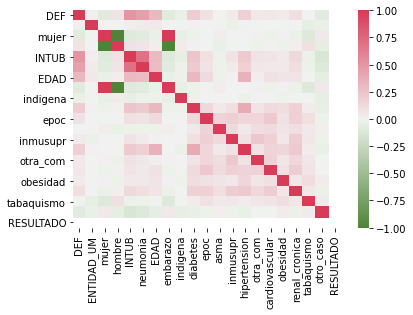

In [19]:

cmap = sns.diverging_palette(120,6,as_cmap=True)
sns.heatmap(pos.corr(),cmap=cmap)


In [20]:
vivo=stat[stat['DEF']==0][[
       'mujer', 'hombre',
       'INTUB', 'neumonia',
       'EDAD', 'embarazo', 'indigena',
       'diabetes', 'epoc', 'asma', 'inmusupr', 'hipertension', 'otra_com',
       'cardiovascular', 'obesidad', 'renal_cronica', 'tabaquismo',
       'otro_caso', 
       ]]
defunto=stat[stat['DEF']==1][[
       'mujer', 'hombre',
       'INTUB', 'neumonia',
       'EDAD', 'embarazo', 'indigena',
       'diabetes', 'epoc', 'asma', 'inmusupr', 'hipertension', 'otra_com',
       'cardiovascular', 'obesidad', 'renal_cronica', 'tabaquismo',
       'otro_caso', 
       ]]

ANALISIS EXPLORATORIA DE LOS DATOS: DIFERENCIAS ENTRE VIVOS Y DEFUNTOS AL COVID-19

In [21]:
vi= dv.generate_statistics_from_dataframe(vivo)
de= dv.generate_statistics_from_dataframe(defunto)
dv.visualize_statistics(lhs_statistics=vi,
                        rhs_statistics=de)

In [22]:

tree=pos[['DEF',
       'mujer', 'hombre',
        'neumonia',
       'EDAD', 'embarazo', 'indigena',
       'diabetes', 'epoc', 'asma', 'inmusupr', 'hipertension', 'otra_com',
       'cardiovascular', 'obesidad', 'renal_cronica']]

# DECISION TREE MODEL

PROBABILIDAD DE MUERTE AL CONTRAER EL COVID-19 UNA VEZ CONTAGIADO

Asumiendo que: 
- todos los pacientes fueron atendidos de la misma forma
- todos los pacientes tuvieron acceso a servicios de salud
- todas las pruebas son veraces: no hay falsos positivos ni falsos negativos

VARIABLES INVOLUCRADAS
- solamente utilicé las variables con más correlación (positiva y negativa) con el status de defunto

PROCESO:
- selecciono solamente los casos positivos al covid-19: 'mujer', 'hombre',
  'neumonia', 'EDAD', 'embarazo', 'indigena', 'diabetes', 'epoc', 'asma',    'inmusupr', 'hipertension', 'otra_com','cardiovascular', 'obesidad', 'renal_cronica'
- estandarizo la data
- uso el GINI decision tree porque es el más eficiente con mucha data y relaciona el status positivo o negativo de una o más patologías existentes en el paciente al mismo tiempo





In [23]:
X = tree.drop(['DEF'], axis=1)

y = tree['DEF']


In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X.astype(int)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  2, ...,  0,  0,  0],
       [ 1, -1,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 1, -1,  0, ...,  0,  0,  0],
       [ 1, -1,  0, ...,  0,  2,  0]])

In [25]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [26]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# GINI CRITERION DECISION TREE

In [27]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [28]:
y_pred_gini = clf_gini.predict(X_test)


In [29]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9299


In [30]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini


array([0, 0, 0, ..., 0, 0, 0])

In [31]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9301


[Text(334.8, 380.52, 'X[2] <= 0.932\ngini = 0.135\nsamples = 257744\nvalue = [238919, 18825]'),
 Text(167.4, 271.8, 'X[3] <= 1.136\ngini = 0.044\nsamples = 216680\nvalue = [211758, 4922]'),
 Text(83.7, 163.07999999999998, 'X[3] <= 0.553\ngini = 0.023\nsamples = 195838\nvalue = [193566, 2272]'),
 Text(41.85, 54.360000000000014, 'gini = 0.014\nsamples = 167532\nvalue = [166369, 1163]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.075\nsamples = 28306\nvalue = [27197, 1109]'),
 Text(251.10000000000002, 163.07999999999998, 'X[3] <= 1.544\ngini = 0.222\nsamples = 20842\nvalue = [18192, 2650]'),
 Text(209.25, 54.360000000000014, 'gini = 0.165\nsamples = 10226\nvalue = [9300, 926]'),
 Text(292.95, 54.360000000000014, 'gini = 0.272\nsamples = 10616\nvalue = [8892, 1724]'),
 Text(502.20000000000005, 271.8, 'X[3] <= 0.728\ngini = 0.448\nsamples = 41064\nvalue = [27161, 13903]'),
 Text(418.5, 163.07999999999998, 'X[3] <= -0.03\ngini = 0.321\nsamples = 20351\nvalue = [16256, 4095]'),
 

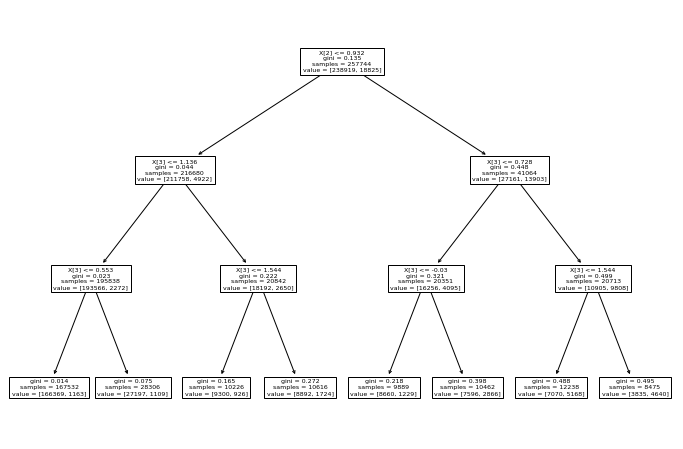

In [32]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

CHECK OVERFITTING AND UNDERFITTING

In [33]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9301
Test set score: 0.9299


Here, the training-set accuracy score is 0.9433 while the test-set accuracy to be 0.9434. These two values are comparable. So, there is no sign of overfitting.

# CHECK TIME-DIFFERENCE DISTRIBUTION

In [34]:
dist=df[['RESULTADO', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF']]

In [35]:
dist['DIAS']= dist['FECHA_INGRESO']-dist['FECHA_SINTOMAS']

<ipython-input-35-1ee4546a8c3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist['DIAS']= dist['FECHA_INGRESO']-dist['FECHA_SINTOMAS']


In [36]:
dist['DIFF']= dist['DIAS'].astype(str).str[0]


<ipython-input-36-e50d12b4bbd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist['DIFF']= dist['DIAS'].astype(str).str[0]


In [37]:
dist['DIFF']=dist['DIFF'].astype(int)

<ipython-input-37-45fe5b6ae521>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist['DIFF']=dist['DIFF'].astype(int)


In [38]:
check=np.asarray(dist[['DIFF']])

TODOS LOS PACIENTES

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


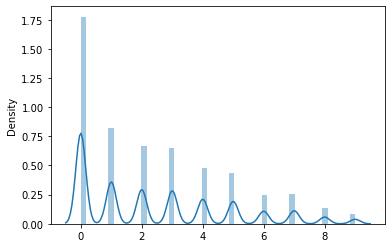

In [39]:
plt.figure()
ax1 = sns.distplot(check)


POSITIVOS VS NEGATIVOS: Los pacientes saben reconocer los sintomas?

In [40]:
pos_dist=dist[dist['RESULTADO']==1]['DIFF']
neg_dist=dist[dist['RESULTADO']==0]['DIFF']

In [41]:
pos_dist= np.asarray(dist[['DIFF']])
neg_dist= np.asarray(dist[['DIFF']])


In [42]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
pos_sc = min_max_scaler.fit_transform(pos_dist)


neg_sc = min_max_scaler.fit_transform(neg_dist)



In [43]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


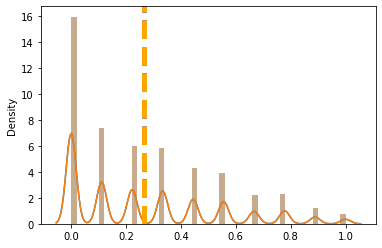

In [44]:
plt.figure()
ax1 = sns.distplot(pos_sc)
ax2 = sns.distplot(neg_sc)
plt.axvline(np.mean(pos_sc), color='blue', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(neg_sc), color='orange', linestyle='dashed', linewidth=5)

NULL HYPOTESIS: POSITIVE INDIVIDUALS GET TEST MORE QUICKLY

In [45]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [46]:
sample_size = 500
exp_sampled = np.random.choice(len(pos_sc), sample_size)
cont_sampled = np.random.choice(len(neg_sc), sample_size)
compare_2_groups(pos_sc, neg_sc, 0.05, sample_size)

Statistics=0.000, p=1.000
Same distributions (fail to reject H0)


In [47]:
print(pos_dist.mean())
print(neg_dist.mean())

2.4009695825883495
2.4009695825883495


CONCLUSIÓN:

Los pacientes que va a hacer el test antigeno para el COVID-19 esperan la misma cantidad de tiempo ya sean positivos o negativos. 
El promedio es de 2.69 días.

OTRA CONSIDERACIÓN: 
Es posible que los pacientes no logren distinguir los síntomas del covid y otros tipos de síntomas por estas razones:
- Los síntomas pueden ser muy parecidos a otras enfermedades
- Los pacientes están mal informados sobre los síntomas típicos del covid

In [48]:
dataset=df[['DEF', 'FECHA_ACTUALIZACION', 'ENTIDAD_UM', 'SEXO', 'MUNICIPIO_RES', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'DEF','ENTIDAD_UM',
       'INTUB', 'neumonia',
       'EDAD', 'embarazo', 'indigena',
       'diabetes', 'epoc', 'asma', 'inmusupr', 'hipertension', 'otra_com',
       'cardiovascular', 'obesidad', 'renal_cronica', 'tabaquismo',
       'otro_caso', 
       'RESULTADO']]


In [49]:
dataset['SEXO']=dataset['SEXO'].astype(str)
dataset.replace({'SEXO' : { 'hombre' : '2', 'mujer' : '1'}})


<ipython-input-49-60b63faada46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['SEXO']=dataset['SEXO'].astype(str)


,DEF,FECHA_ACTUALIZACION,ENTIDAD_UM,SEXO,MUNICIPIO_RES,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,DEF,ENTIDAD_UM,INTUB,neumonia,EDAD,embarazo,indigena,diabetes,epoc,asma,inmusupr,hipertension,otra_com,cardiovascular,obesidad,renal_cronica,tabaquismo,otro_caso,RESULTADO
14,0,2021-04-30,22,2,14,2020-08-31,2020-08-26,9999-99-99,0,22,0,0,54,0,0,0,0,0,0,0,0,0,0,0,0,0,1
21,0,2021-04-30,29,2,117,2020-07-01,2020-06-26,9999-99-99,0,29,1,1,12,0,0,1,0,0,0,0,0,0,0,0,0,1,1
60,0,2021-04-30,9,1,2,2020-06-15,2020-06-12,9999-99-99,0,9,0,0,13,1,0,0,0,0,0,0,0,0,0,0,0,1,1
61,1,2021-04-30,9,2,95,2020-02-18,2020-02-18,2020-05-11,1,9,1,1,60,0,0,0,0,0,0,0,0,0,0,0,1,1,1
75,0,2021-04-30,15,2,60,2020-10-14,2020-10-10,9999-99-99,0,15,0,0,33,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6632861,0,2021-04-30,9,2,2,2021-04-20,2021-04-20,9999-99-99,0,9,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6632868,0,2021-04-30,9,2,103,2021-04-21,2021-04-21,9999-99-99,0,9,0,0,42,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6632910,0,2021-04-30,9,1,3,2021-04-16,2021-04-16,9999-99-99,0,9,0,0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6632921,0,2021-04-30,9,1,7,2021-04-21,2021-04-21,9999-99-99,0,9,0,0,48,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [50]:
dataset.to_csv('/Users/fabiobisognin/Desktop/data_covid.csv')
